In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import math as m
import scipy.stats as sts

from scipy.spatial.distance import pdist, squareform
from mcvae.distributions.normal import Normal, GaussianMixture

In [2]:
a = np.array( [2,2,2,2,2,2,2,2, 3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3, 4,4,4,4,4, 5,5,5, 6])

In [3]:
print(a.mean())
print(np.quantile(a, [0.25, 0.5, 0.75]))

3.1818181818181817
[3. 3. 4.]


In [4]:
# Paramètres de mélange
weights = torch.tensor([0.4, 0.4, 0.2])
locs = torch.tensor([0.0, 5.0, 10.0])
scales = torch.tensor([1.0, 1.5, 0.5])

# Créer la distribution de mélange
mixture_dist = GaussianMixture(weights, locs, scales)

# Tirer un échantillon
sample = mixture_dist.sample((1000,))

# Calculer la log-probabilité de cet échantillon
log_prob = mixture_dist.log_prob(sample)

NameError: name 'torch' is not defined

## Product of Experts

In [7]:
def mu_tilde2 (mu1, mu2, sig1, sig2):
    return (mu1*sig2**2+mu2*sig1**2)/(sig2**2+sig1**2)

def sig_tilde2(sig1, sig2):
    return 1/(1/sig1**2 + 1/sig2**2)

def const_norm2 (mu1, mu2, sig1, sig2):
    rac = np.sqrt((sig1**2+sig2**2)*2*np.pi)
    exp = np.exp( -(1/(2*(sig1**2)*(sig2**2))) * ((mu1*sig2**2 + mu2*sig1**2)**2 - mu1**2*sig2**2 - mu2**2*sig1**2) )
    
    return  exp * rac 

In [8]:
def prod_sig( list_sig):
    s= 0 
    for sig in list_sig:
        s+= sig**(-1)
    return s**(-1)

def prod_mu (list_mu, list_sig):
    s = prod_sig(list_sig)
    s_mu = 0
    for i, mu in enumerate(list_mu):
        s_mu+= mu*list_sig[i]**(-1)
    return s_mu*s

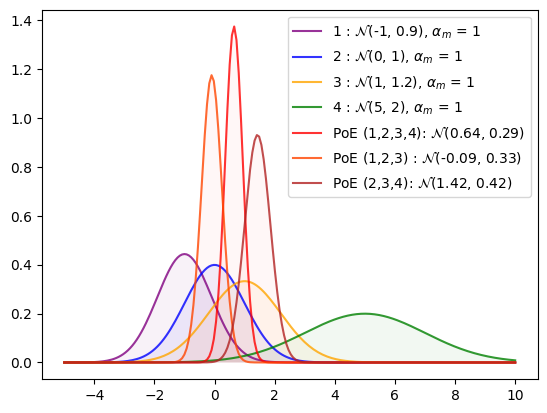

In [9]:
xx = np.linspace(-5, 10, 200)

list_mu = [-1, 0, 1, 5]
list_sig = [0.9,  1, 1.2, 2]

list_colors = ['purple', 'b', 'orange', 'g']

fig, ax = plt.subplots()

for i in range(len(list_mu)):
    f = sts.norm(loc = list_mu[i], scale = list_sig[i]).pdf
    ax.fill_between(xx, f(xx), facecolor = list_colors[i], alpha = 0.05)
    plt.plot(xx, f(xx), alpha = 0.8, color = list_colors[i], label = str(i+1)+" : $\mathcal{N}($"+str(list_mu[i])+", "+str(list_sig[i])+"), $\\alpha_m$ = 1")
    

mu = prod_mu(list_mu, list_sig)
sig = prod_sig( list_sig)
f_prod = sts.norm(loc = mu, scale = sig).pdf

ax.fill_between(xx, f_prod(xx), facecolor = 'r', alpha = 0.03)
plt.plot(xx, 
         f_prod(xx), 
         'r', 
         alpha = 0.8,
         label = "PoE (1,2,3,4): $\mathcal{N}($"+str(int(100*mu)/100)+", "+str(int(100*sig)/100)+")")



mu = prod_mu(list_mu[:-1], list_sig[:-1])
sig = prod_sig( list_sig[:-1])
f_prod = sts.norm(loc = mu, scale = sig).pdf
ax.fill_between(xx, f_prod(xx), facecolor = 'r', alpha = 0.03)
plt.plot(xx, 
         f_prod(xx), 
         'orangered', 
         alpha = 0.8,
         label = "PoE (1,2,3) : $\mathcal{N}($"+str(int(100*mu)/100)+", "+str(int(100*sig)/100)+")")

mu = prod_mu(list_mu[1:], list_sig[1:])
sig = prod_sig( list_sig[1:])
f_prod = sts.norm(loc = mu, scale = sig).pdf
ax.fill_between(xx, f_prod(xx), facecolor = 'r', alpha = 0.03)
plt.plot(xx, 
         f_prod(xx), 
         'firebrick', 
         alpha = 0.8,
         label = "PoE (2,3,4): $\mathcal{N}($"+str(int(100*mu)/100)+", "+str(int(100*sig)/100)+")")


plt.legend()


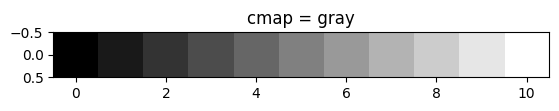

Text(0.5, 1.0, 'cmap = binary')

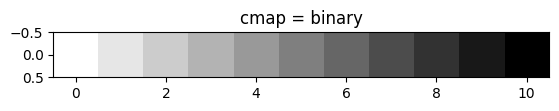

In [ ]:
plt.imshow([[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]], cmap = 'gray')
plt.title('cmap = gray')
plt.show()
plt.imshow([[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]], cmap = 'binary')
plt.title('cmap = binary')

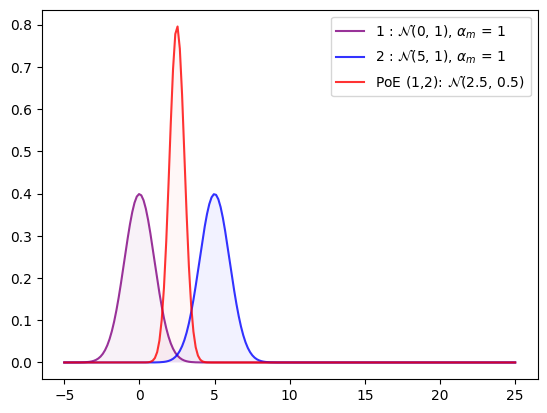

In [10]:
xx = np.linspace(-5, 25, 200)

list_mu = [0, 5]
list_sig = [1, 1]

list_colors = ['purple', 'b', 'orange', 'g']

fig, ax = plt.subplots()

for i in range(len(list_mu)):
    f = sts.norm(loc = list_mu[i], scale = list_sig[i]).pdf
    ax.fill_between(xx, f(xx), facecolor = list_colors[i], alpha = 0.05)
    plt.plot(xx, f(xx), alpha = 0.8, color = list_colors[i], label = str(i+1)+" : $\mathcal{N}($"+str(list_mu[i])+", "+str(list_sig[i])+"), $\\alpha_m$ = 1")
    

mu = prod_mu(list_mu, list_sig)
sig = prod_sig( list_sig)
f_prod = sts.norm(loc = mu, scale = sig).pdf
ax.fill_between(xx, f_prod(xx), facecolor = 'r', alpha = 0.03)
plt.plot(xx, 
         f_prod(xx), 
         'r', 
         alpha = 0.8,
         label = "PoE (1,2): $\mathcal{N}($"+str(int(100*mu)/100)+", "+str(int(100*sig)/100)+")")

plt.legend()


## Mixture of Experts

In [ ]:
def f_moe(x, list_f, list_w):
    f_moe = list_w[0]*list_f[0](x)
    for i, f in enumerate(list_f[1:]):
        f_moe += f(x)*list_w[i]
    return f_moe

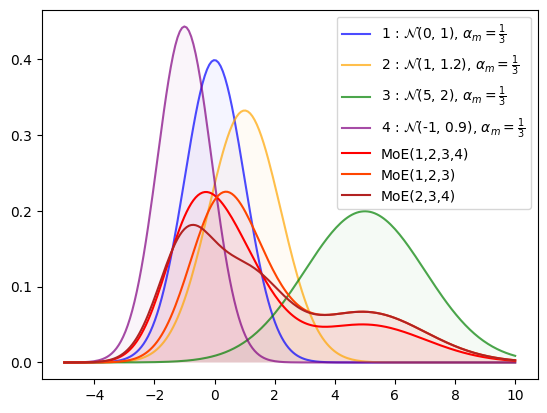

In [ ]:
xx = np.linspace(-5, 10, 200)

list_mu = [0, 1, 5, -1]
list_sig = [1, 1.2, 2, 0.9]
list_w4 = [1/4, 1/4, 1/4, 1/4]

list_colors = ['b', 'orange', 'g', 'purple']
list_f = []
fig, ax = plt.subplots()

for i in range(len(list_mu)):
    f = sts.norm(loc = list_mu[i], scale = list_sig[i]).pdf
    list_f.append(f)
    ax.fill_between(xx, f(xx), facecolor = list_colors[i], alpha = 0.04)
    plt.plot(xx, f(xx), alpha = 0.7, color = list_colors[i], label = str(i+1)+" : $\mathcal{N}($"+str(list_mu[i])+", "+str(list_sig[i])+"), $\\alpha_m = \\frac{1}{3}$")
    

ax.fill_between(xx, f_moe(xx, list_f=list_f, list_w=list_w4), facecolor = 'r', alpha = 0.04)
plt.plot(xx, 
         f_moe(xx, list_f=list_f, list_w=list_w4), 
         'r', 
         label = "MoE(1,2,3,4)")


list_w3 = [1/3, 1/3, 1/3]
ax.fill_between(xx, f_moe(xx, list_f=list_f[:-1], list_w=list_w3), facecolor = 'r', alpha = 0.04)
plt.plot(xx, 
         f_moe(xx, list_f=list_f[:-1], list_w=list_w3), 
         'orangered', 
         label = "MoE(1,2,3)")

ax.fill_between(xx, f_moe(xx, list_f=list_f[1:], list_w=list_w3), facecolor = 'r', alpha = 0.04)
plt.plot(xx, 
         f_moe(xx, list_f=list_f[1:], list_w=list_w3), 
         'firebrick', 
         label = "MoE(2,3,4)")


plt.legend()


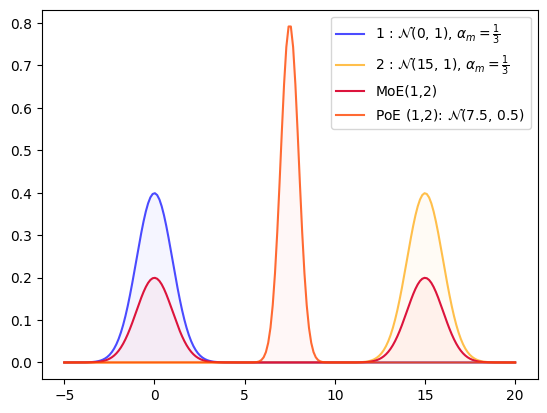

In [ ]:
xx = np.linspace(-5, 20, 200)

list_mu = [0, 15]
list_sig = [1, 1]
list_w4 = [1/2, 1/2]

list_colors = ['b', 'orange', 'g', 'purple']
list_f = []
fig, ax = plt.subplots()

for i in range(len(list_mu)):
    f = sts.norm(loc = list_mu[i], scale = list_sig[i]).pdf
    list_f.append(f)
    ax.fill_between(xx, f(xx), facecolor = list_colors[i], alpha = 0.04)
    plt.plot(xx, f(xx), alpha = 0.7, color = list_colors[i], label = str(i+1)+" : $\mathcal{N}($"+str(list_mu[i])+", "+str(list_sig[i])+"), $\\alpha_m = \\frac{1}{3}$")
    

ax.fill_between(xx, f_moe(xx, list_f=list_f, list_w=list_w4), facecolor = 'r', alpha = 0.04)
plt.plot(xx, 
         f_moe(xx, list_f=list_f, list_w=list_w4), 
         'crimson', 
         label = "MoE(1,2)")


mu = prod_mu(list_mu, list_sig)
sig = prod_sig( list_sig)
f_prod = sts.norm(loc = mu, scale = sig).pdf
ax.fill_between(xx, f_prod(xx), facecolor = 'r', alpha = 0.03)
plt.plot(xx, 
         f_prod(xx), 
         'orangered', 
         alpha = 0.8,
         label = "PoE (1,2): $\mathcal{N}($"+str(int(100*mu)/100)+", "+str(int(100*sig)/100)+")")

plt.legend()

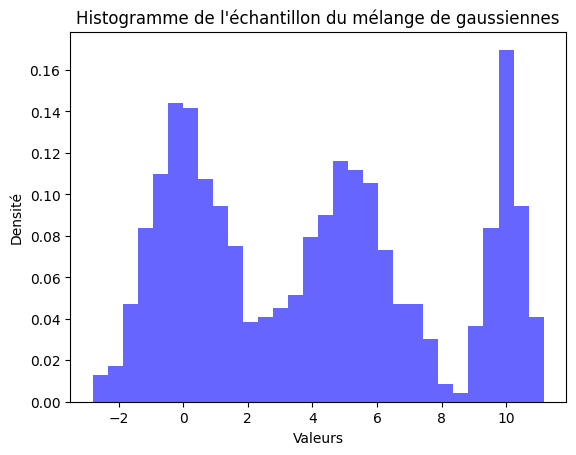

In [ ]:
def sample_gaussian_mixture(n, theta):
    """
    Génère un échantillon de taille n pour un mélange de gaussiennes.

    Paramètres :
    - n : taille de l'échantillon
    - theta : dictionnaire contenant les paramètres du mélange
      avec les clés : 'p', 'mus' et 'sigmas'
      'p' : liste des probabilités pour chaque composante (doit être de somme 1)
      'mus' : liste des moyennes pour chaque composante
      'sigmas' : liste des écarts-types pour chaque composante
    
    Retourne :
    - échantillon de taille n
    """
    p = theta['p']
    mus = theta['mus']
    sigmas = theta['sigmas']
    k = len(p)  # Nombre de composantes dans le mélange
    
    # Vérification des tailles de listes
    assert len(mus) == k and len(sigmas) == k, "Les paramètres de mélange doivent être de la même taille"
    assert np.isclose(sum(p), 1), "Les probabilités de mélange doivent sommer à 1"
    
    # Choisir les composantes pour chaque échantillon
    component_choices = np.random.choice(k, size=n, p=p)
    
    # Générer les échantillons selon la composante choisie
    samples = np.array([np.random.normal(mus[i], sigmas[i]) for i in component_choices])
    
    return samples

# Paramètres du mélange de gaussiennes avec plusieurs composantes
theta = {
    'p': [0.4, 0.4, 0.2],       # Probabilités de chaque composante (somme à 1)
    'mus': [0, 5, 10],          # Moyennes des composantes
    'sigmas': [1, 1.5, 0.5]     # Écarts-types des composantes
}

# Générer un échantillon de taille n
n = 1000
samples = sample_gaussian_mixture(n, theta)

# Visualiser l'échantillon
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b')
plt.title("Histogramme de l'échantillon du mélange de gaussiennes")
plt.xlabel("Valeurs")
plt.ylabel("Densité")
plt.show()


## Mixture of Product of experts

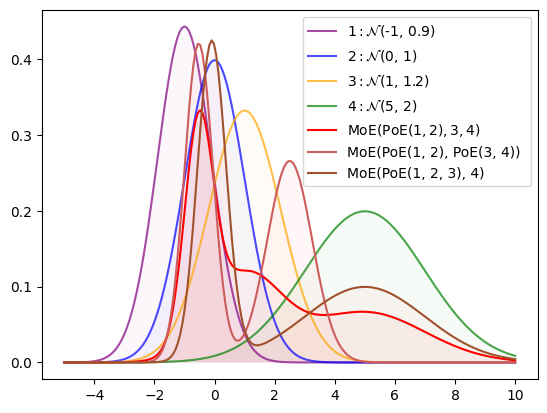

In [ ]:
xx = np.linspace(-5, 10, 200)

list_mu = [-1, 0, 1, 5]
list_sig = [0.9, 1, 1.2, 2]
list_w = [1/3, 1/3, 1/3]

list_colors = ['purple', 'b', 'orange', 'g']
list_f = []
fig, ax = plt.subplots()

for i in range(len(list_mu)):
    f = sts.norm(loc = list_mu[i], scale = list_sig[i]).pdf
    list_f.append(f)
    ax.fill_between(xx, f(xx), facecolor = list_colors[i], alpha = 0.03)
    plt.plot(xx, f(xx), alpha = 0.7, color = list_colors[i], label = str(i+1)+"$ : \mathcal{N}($"+str(list_mu[i])+", "+str(list_sig[i])+")")
    


mu = prod_mu(list_mu[:2], list_sig[:2])
sig = prod_sig( list_sig[:2])
f_1_2 = sts.norm(loc = mu, scale = sig).pdf

f_final_xx = f_moe(xx,  list_f = [f_1_2, list_f[2], list_f[3]], list_w=  [1/3, 1/3, 1/3])
ax.fill_between(xx, f_final_xx, facecolor = 'r', alpha = 0.03)
plt.plot(xx, 
         f_final_xx, 
         'r', 
         label = "MoE(PoE$(1, 2), 3, 4)$ ")


mu = prod_mu(list_mu[:2], list_sig[:2])
sig = prod_sig( list_sig[:2])
f_1_2 = sts.norm(loc = mu, scale = sig).pdf

mu = prod_mu(list_mu[2:], list_sig[2:])
sig = prod_sig( list_sig[2:])
f_3_4 = sts.norm(loc = mu, scale = sig).pdf

f_final_xx = f_moe(xx,  list_f = [f_1_2, f_3_4], list_w=  [1/2, 1/2])
ax.fill_between(xx, f_final_xx, facecolor = 'r', alpha = 0.03)
plt.plot(xx, 
         f_final_xx, 
         'indianred', 
         label = "MoE(PoE(1, 2), PoE(3, 4)) ")


mu = prod_mu(list_mu[:3], list_sig[:3])
sig = prod_sig( list_sig[:2])
f_1_2_3 = sts.norm(loc = mu, scale = sig).pdf



f_final_xx = f_moe(xx,  list_f = [f_1_2_3, list_f[3]], list_w=  [1/2, 1/2])
ax.fill_between(xx, f_final_xx, facecolor = 'r', alpha = 0.03)
plt.plot(xx, 
         f_final_xx, 
         'sienna', 
         label = "MoE(PoE(1, 2, 3), 4) ")


plt.legend()


# Product of Mixture of Experts

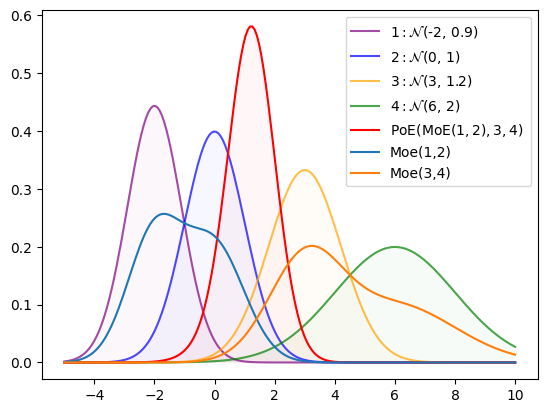

In [ ]:
xx = np.linspace(-5, 10, 200)

list_mu = [-2, 0, 3, 6]
list_sig = [0.9, 1, 1.2, 2]
list_w = [1/3, 1/3, 1/3]

list_colors = ['purple', 'b', 'orange', 'g']
list_f = []
fig, ax = plt.subplots()

for i in range(len(list_mu)):
    f = sts.norm(loc = list_mu[i], scale = list_sig[i]).pdf
    list_f.append(f)
    ax.fill_between(xx, f(xx), facecolor = list_colors[i], alpha = 0.03)
    plt.plot(xx, f(xx), alpha = 0.7, color = list_colors[i], label = str(i+1)+"$ : \mathcal{N}($"+str(list_mu[i])+", "+str(list_sig[i])+")")
    



def f_1_2 (x):
    return list_f[0](x)/2 + list_f[1](x)/2

def f_3_4 (x):
    return list_f[2](x)/2 + list_f[3](x)/2


def f_prod (x, lf, lw=None):
    p=1
    if lw is None : 
        n=len(lf)
        lw=[1 for _ in range(n)]
    for i, f in enumerate(lf):
        p=p*f(x)**lw[i]
    return p*100

f_final_xx = f_prod(xx,  [f_1_2, f_3_4])
ax.fill_between(xx, f_final_xx, facecolor = 'r', alpha = 0.03)
plt.plot(xx, 
         f_final_xx, 
         'r', 
         label = "PoE(MoE$(1, 2), 3, 4)$ ")

plt.plot(xx, f_1_2(xx), label ='Moe(1,2)')
plt.plot(xx, f_3_4(xx), label ='Moe(3,4)')


# mu = prod_mu(list_mu[:2], list_sig[:2])
# sig = prod_sig( list_sig[:2])
# f_1_2 = sts.norm(loc = mu, scale = sig).pdf

# mu = prod_mu(list_mu[2:], list_sig[2:])
# sig = prod_sig( list_sig[2:])
# f_3_4 = sts.norm(loc = mu, scale = sig).pdf

# f_final_xx = f_moe(xx,  list_f = [f_1_2, f_3_4], list_w=  [1/2, 1/2])
# ax.fill_between(xx, f_final_xx, facecolor = 'r', alpha = 0.03)
# plt.plot(xx, 
#          f_final_xx, 
#          'indianred', 
#          label = "MoE(PoE(1, 2), PoE(3, 4)) ")


# mu = prod_mu(list_mu[:3], list_sig[:3])
# sig = prod_sig( list_sig[:2])
# f_1_2_3 = sts.norm(loc = mu, scale = sig).pdf



# f_final_xx = f_moe(xx,  list_f = [f_1_2_3, list_f[3]], list_w=  [1/2, 1/2])
# ax.fill_between(xx, f_final_xx, facecolor = 'r', alpha = 0.03)
# plt.plot(xx, 
#          f_final_xx, 
#          'sienna', 
#          label = "MoE(PoE(1, 2, 3), 4) ")


plt.legend()


In [ ]:
def reject_sample(f, m =-10, ma= 20, size= 1):
    res = []
    for _ in range(size):
        x= m + np.random.rand()*(ma-m)
        y = np.random.rand()
        while y>f(x):
            x= m + np.random.rand()*(ma-m)
            y = np.random.rand()
        res.append(x)
        del x
        del y
    return res

def reject_sample_pre(fx, x, m =-10, ma= 20, size= 1):
    res = []
    for _ in range(size):
        i = np.random.randint(len(xx))
        y = np.random.rand()
        while y>fx[i]:
            i = np.random.randint(len(xx))
            y = np.random.rand()
        res.append(xx[i])
    return res
    

def print_test(test):
    s = test.statistic
    p = test.pvalue
    print(f'stat : {s}')
    print(f'p-value : {p}')
    print(s<p)
    print(s-p)
    print('---------------')


In [ ]:


t =  reject_sample_pre(f_final_xx, xx, size=200)
print_test(sts.normaltest(t))


t = reject_sample(sts.norm().pdf, size=100000)
print_test(sts.normaltest(t))

t =  reject_sample(f_1_2,size=200)
print_test(sts.normaltest(t))

t =  reject_sample(f_3_4,size=200)
print_test(sts.normaltest(t))

stat : 1.0881077910356969
p-value : 0.5803906338440237
False
0.5077171571916732
---------------
stat : 0.3088793723178999
p-value : 0.8568951732228132
True
-0.5480158009049132
---------------
stat : 2.0398856918184074
p-value : 0.36061555023799885
False
1.6792701415804085
---------------
stat : 21.829606876150613
p-value : 1.8187001213874755e-05
False
21.8295886891494
---------------


 N : 100
stat : 0.4209219576483812
p-value : 0.8102106699095144
True
-0.3892887122611332
---------------


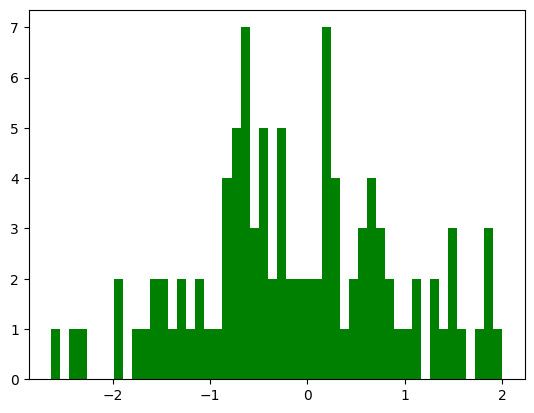

 N : 100
stat : 0.14021467150896383
p-value : 0.9322937460826601
True
-0.7920790745736963
---------------


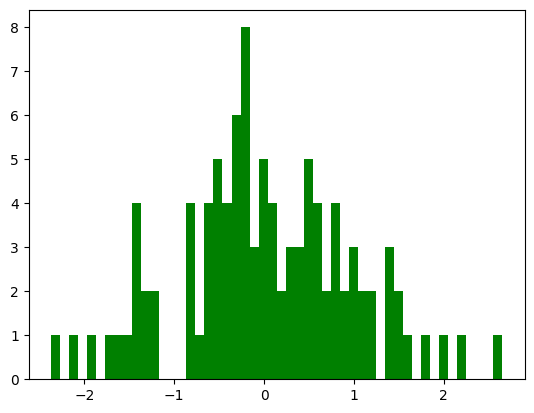

 N : 100
stat : 1.414321767135125
p-value : 0.4930420159266412
False
0.9212797512084837
---------------


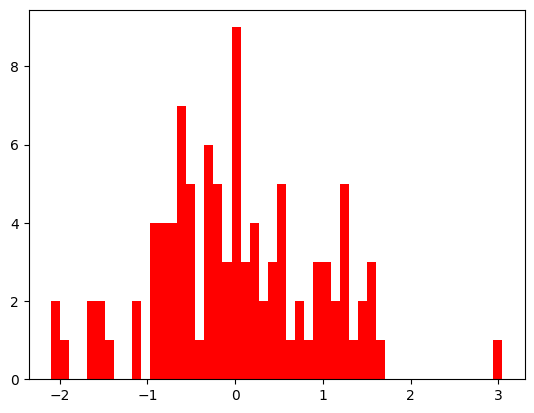

 N : 100
stat : 0.9610745249681703
p-value : 0.6184510319941723
False
0.34262349297399797
---------------


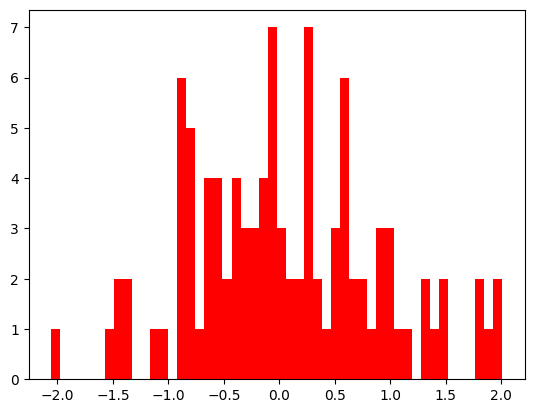

 N : 100
stat : 6.13385565648471
p-value : 0.04656398790983533
False
6.087291668574874
---------------


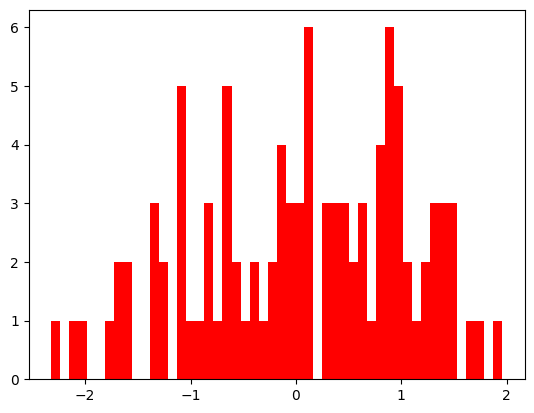

 N : 500
stat : 0.7705691562488529
p-value : 0.6802570223892065
False
0.09031213385964643
---------------


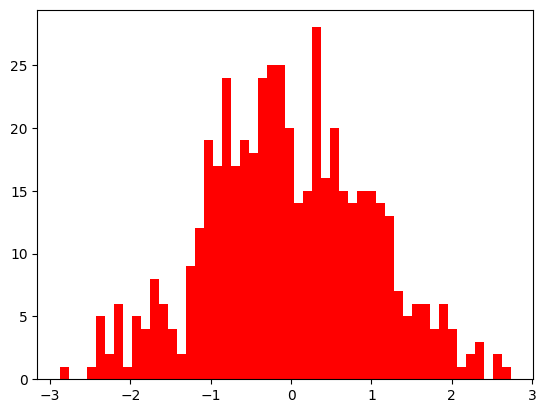

 N : 500
stat : 0.01327981669695569
p-value : 0.9933820871333736
True
-0.980102270436418
---------------


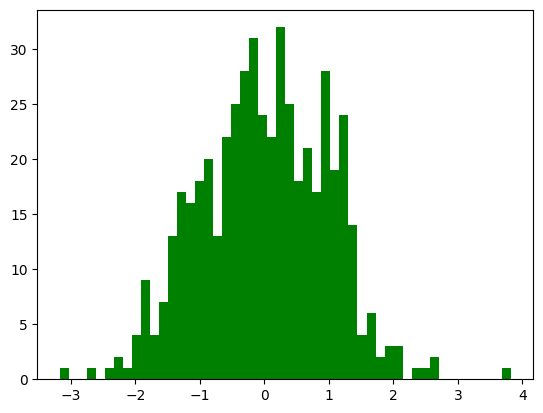

 N : 500
stat : 0.502385365090552
p-value : 0.7778724746698444
True
-0.27548710957929246
---------------


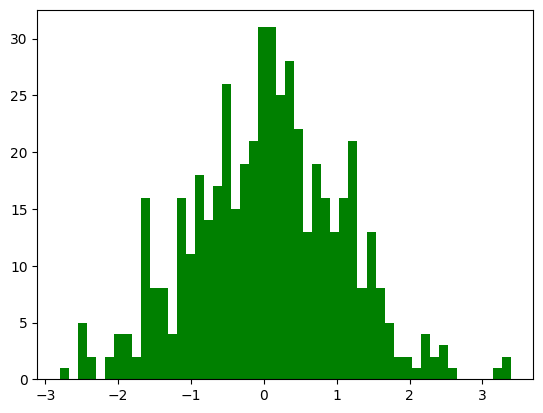

 N : 500
stat : 0.7939301027895502
p-value : 0.6723575231796992
False
0.12157257960985102
---------------


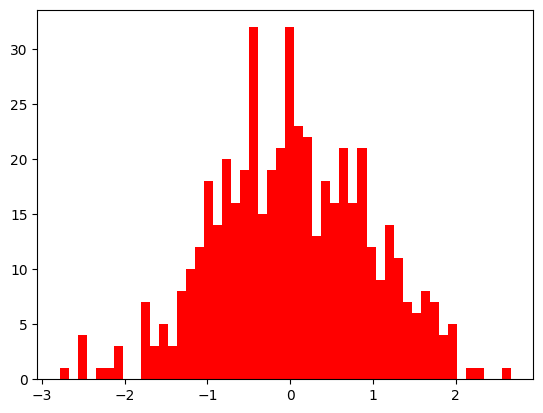

 N : 500
stat : 0.6014551626805004
p-value : 0.7402794112054623
True
-0.1388242485249619
---------------


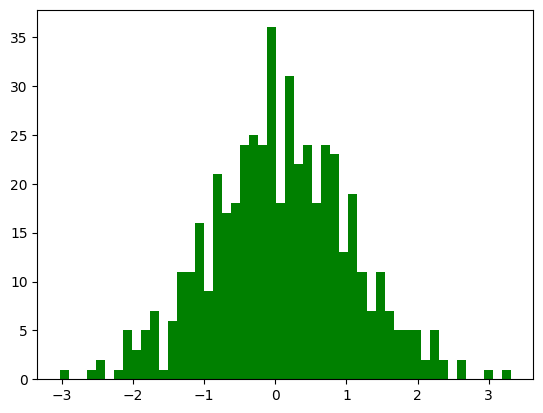

 N : 1000
stat : 1.6211710495616154
p-value : 0.44459766704375137
False
1.176573382517864
---------------


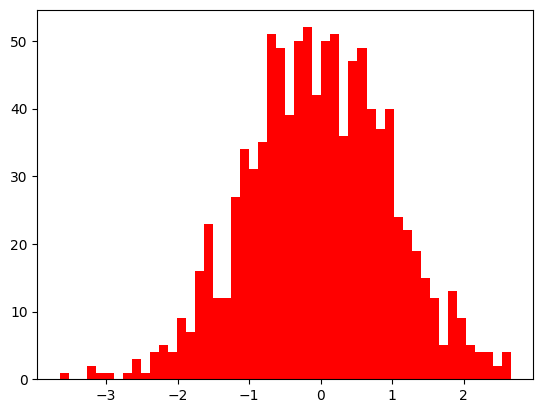

 N : 1000
stat : 1.7114123666371683
p-value : 0.4249829692053749
False
1.2864293974317933
---------------


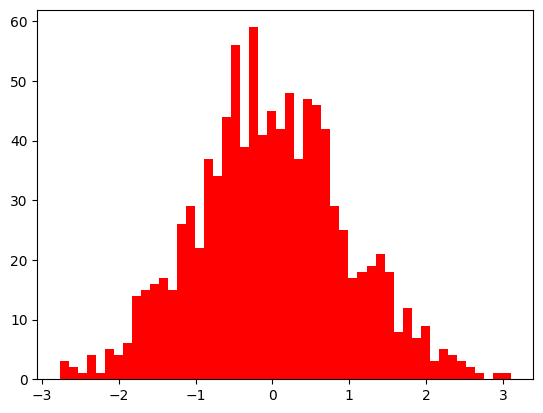

 N : 1000
stat : 0.30369595937389054
p-value : 0.85911887433466
True
-0.5554229149607695
---------------


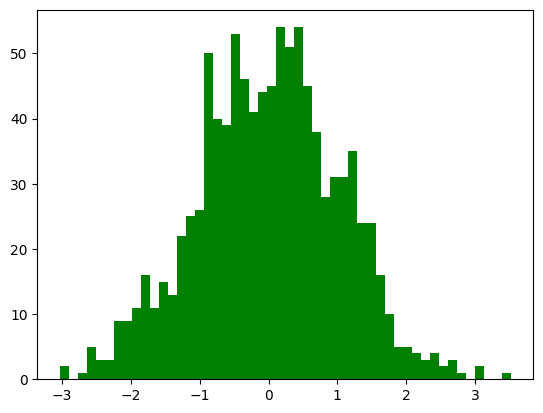

 N : 1000
stat : 0.5933834713294577
p-value : 0.7432731016387004
True
-0.14988963030924274
---------------


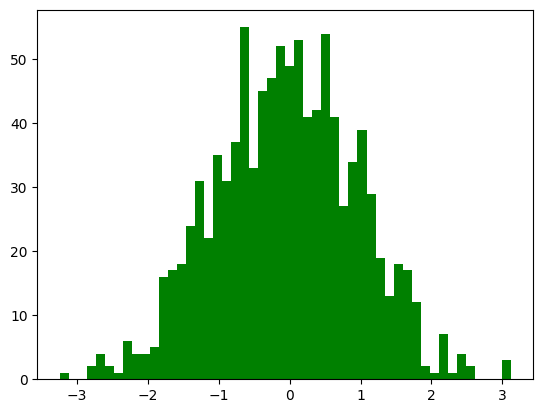

 N : 1000
stat : 1.6554620100122548
p-value : 0.437039803283335
False
1.2184222067289197
---------------


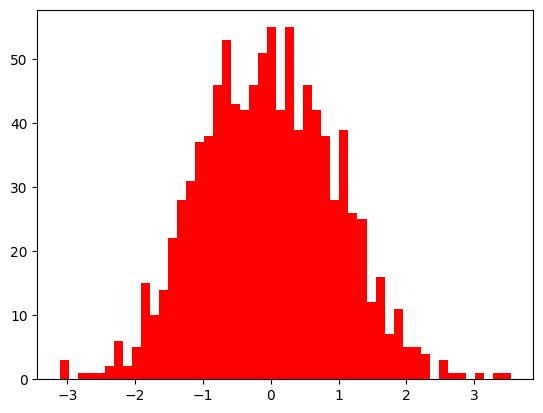

 N : 5000
stat : 0.18794417310368325
p-value : 0.9103081717260918
True
-0.7223639986224085
---------------


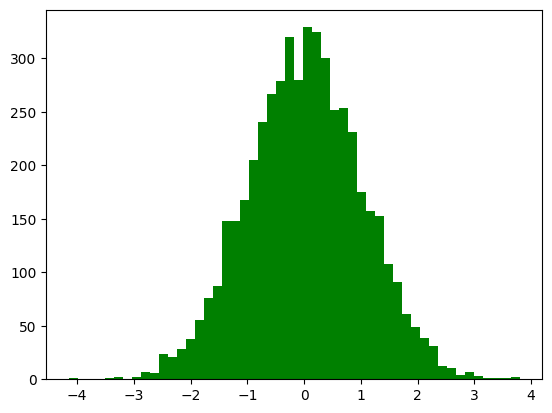

 N : 5000
stat : 0.7646786989686625
p-value : 0.6822634881539889
False
0.08241521081467362
---------------


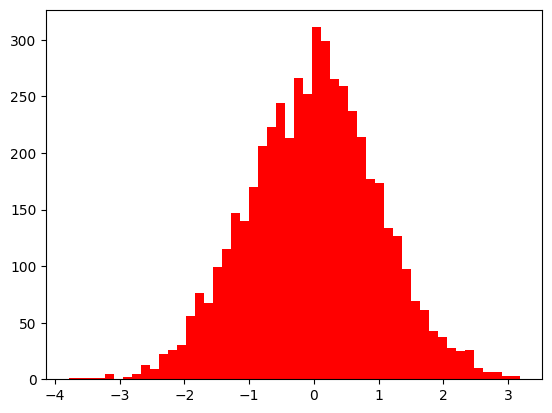

 N : 5000
stat : 0.45875516578685904
p-value : 0.7950282877435849
True
-0.3362731219567259
---------------


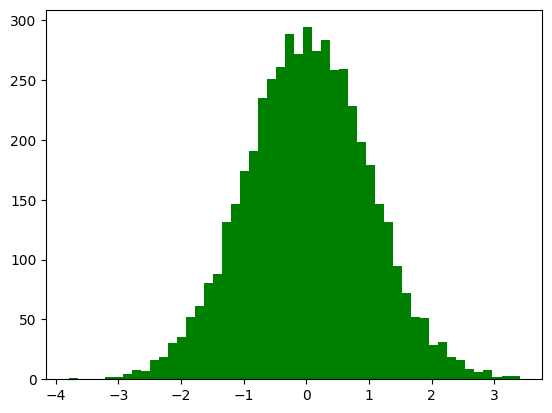

 N : 5000
stat : 0.12465410266579466
p-value : 0.9395755471008637
True
-0.814921444435069
---------------


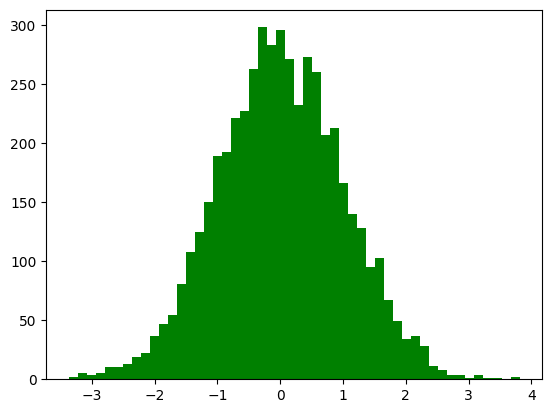

 N : 5000
stat : 2.547689369896948
p-value : 0.2797539855823365
False
2.2679353843146113
---------------


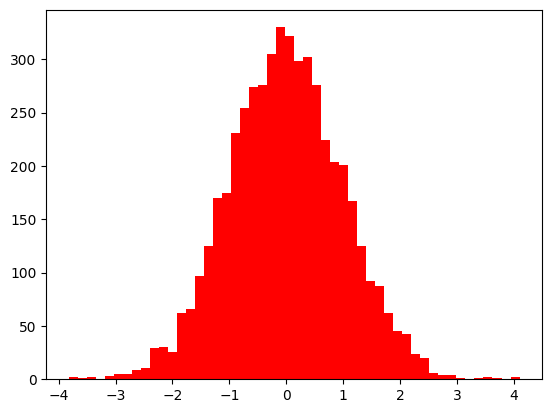

In [ ]:
for N in [100, 500, 1000, 5000]:
    for _ in range(5):
        print(f' N : {N}')
        t = reject_sample(sts.norm().pdf, size=N)
        test = sts.normaltest(t)
        print_test(test)
        s = test.statistic
        p = test.pvalue
        if s<p :
            col = 'green'
        else : 
            col = 'red'
        plt.hist(t, color = col, bins=50)
        plt.show()

# Tests matrice affinité

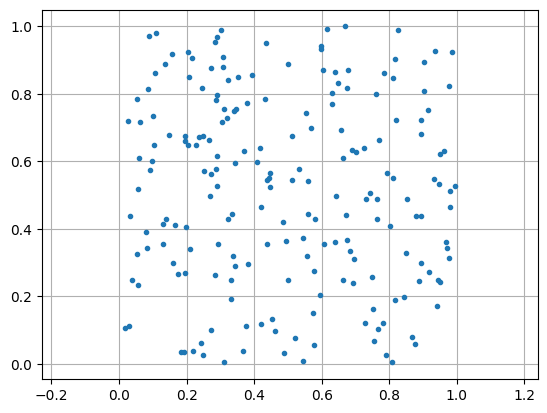

Text(0.5, 1.0, "Matrice d'affinité (points triés)")

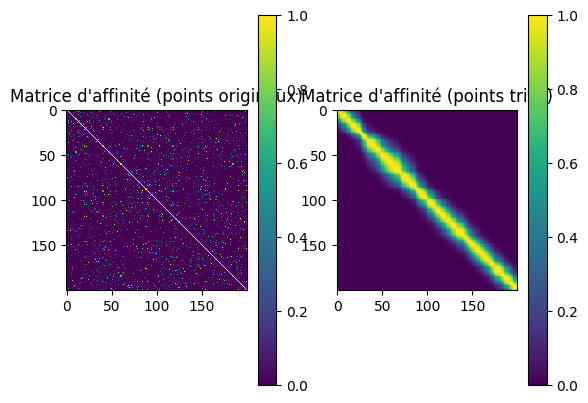

In [ ]:
# Paramètres
N = 200
kNN = 5

# Générer des points aléatoires
x = np.random.rand(N, 2)

# Affichage des points
plt.figure()
plt.plot(x[:, 0], x[:, 1], '.')
plt.axis('equal')
plt.grid(True)
plt.show()

# Calculer la matrice des distances (équivalent de pdist et squareform)
tmpK = squareform(pdist(x))

# Supprimer les diagonales (self-distances) en les remplaçant par l'infini
tmpD = tmpK + np.diag(np.full(N, np.inf))

# Trier les distances et prendre les k plus proches voisins (kNN)
tmpD = np.sort(tmpD, axis=0)
tmpB = tmpD[:kNN, :]

# Calcul de sigma comme la moyenne des distances des k plus proches voisins
sigma = np.mean(tmpB)

# Calculer la matrice d'affinité avec un noyau gaussien
K = np.exp(-tmpK**2 / (2 * sigma**2))

# Trier les points sur la première dimension
xS = np.sort(x, axis=0)

# Calculer la matrice des distances pour les points triés
tmpS = squareform(pdist(xS))

# Calculer la matrice d'affinité pour les points triés
KS = np.exp(-tmpS**2 / (2 * sigma**2))

# Affichage des matrices d'affinité
plt.figure()

# Première matrice d'affinité
plt.subplot(1, 2, 1)
plt.imshow(K, aspect='equal', interpolation='none')
plt.colorbar()
plt.title('Matrice d\'affinité (points originaux)')

# Deuxième matrice d'affinité pour les points triés
plt.subplot(1, 2, 2)
plt.imshow(KS, aspect='equal', interpolation='none')
plt.colorbar()
plt.title('Matrice d\'affinité (points triés)')

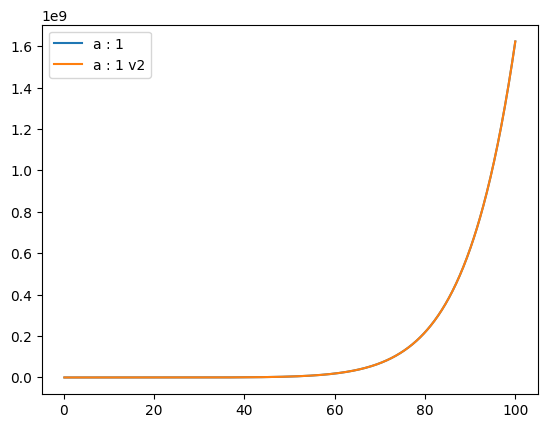

In [27]:
b = 100
list_a = [ 1]
xx = np.linspace(0.1, b, 1000)

for a in list_a : 
    yy = np.exp(a * np.log(xx)**2)
    plt.plot(xx, yy, label = f'a : {a}')

plt.legend()